<a href="https://colab.research.google.com/github/deshpandenu/Time-Series-Forecasting-of-Amazon-Stock-Prices-using-Neural-Networks-LSTM-and-GAN-/blob/master/AUTO_ARIMA_AND_FBPROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pmdarima

     |████████████████████████████████| 1.1MB 2.6MB/s 


In [2]:
!pip3 install chart-studio

     |████████████████████████████████| 81kB 2.6MB/s 


TAKE IN DATA AND WORK WITH IT

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
from google.colab import drive

# This will prompt for authorization.
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
googlepath = "/content/drive/My Drive/dataAlpha/"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

data_frame_main = pd.read_csv(f'{googlepath}Close.csv')

In [7]:
data_frame_main.head()

#decide the date and target valueshere

df = data_frame_main
df.head()

,Unnamed: 0,Date,Close
0,5031,8/7/2019,1793.4000
1,5030,8/6/2019,1787.8300
2,5029,8/5/2019,1765.1300
3,5028,8/2/2019,1823.2400
4,5027,8/1/2019,1855.3199


In [0]:
df = df[['Date','Close']] #take in input from user for date and target 
data = df

Now convert this data to datatime format so we can find more seasonality 

In [9]:
data.head()

,Date,Close
0,8/7/2019,1793.4000
1,8/6/2019,1787.8300
2,8/5/2019,1765.1300
3,8/2/2019,1823.2400
4,8/1/2019,1855.3199


SEASONALITY OF THE DATA

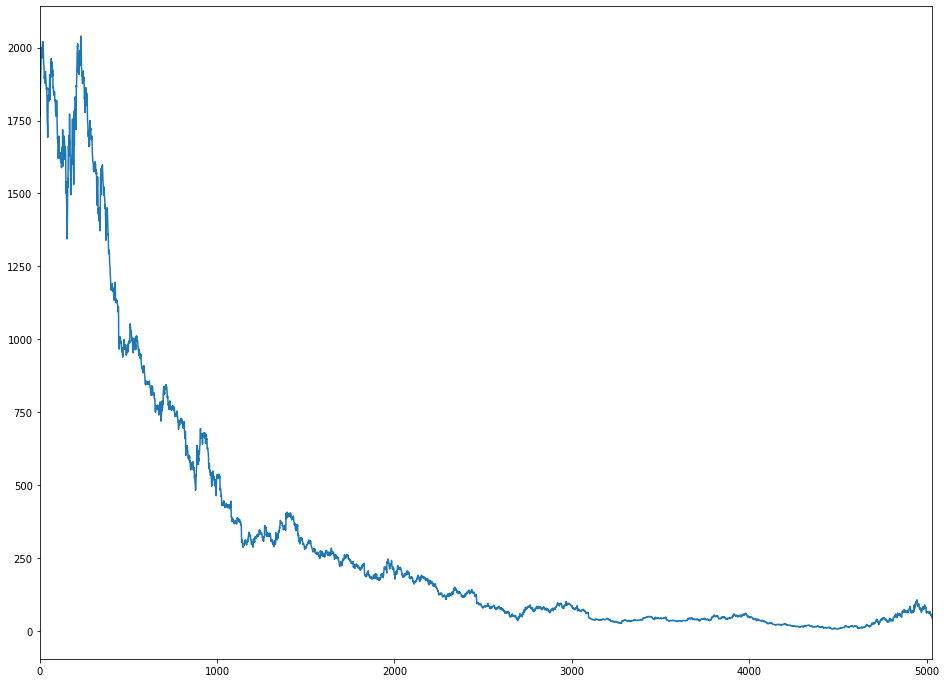

In [10]:
data['Close'].plot(figsize=(16, 12))

<Figure size 432x288 with 0 Axes>

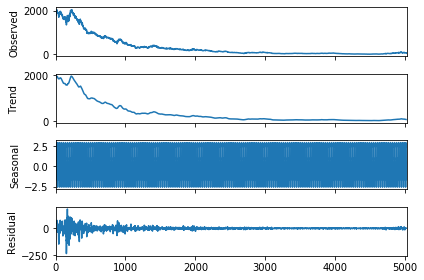

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Close'], model='additive', freq=30)
fig = plt.figure()
fig = decomposition.plot()


In [12]:
decomposition.seasonal

0      -2.567657
1      -1.403710
2      -0.942764
3      -1.586548
4      -0.372740
          ...   
5027    2.818979
5028    2.436119
5029    2.779462
5030    2.707895
5031    2.973811
Name: Close, Length: 5032, dtype: float64

<Figure size 432x288 with 0 Axes>

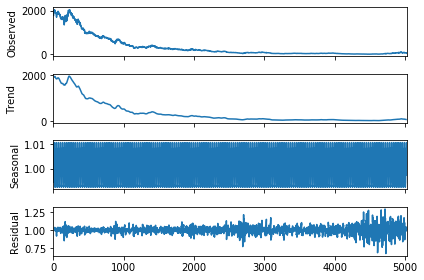

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Close'], model='multiplicative', freq=30)
fig = plt.figure()
fig = decomposition.plot()


Can show these graphs to users which displays seasonality and trends.
Then find ARIMA and FBProphet

In [14]:
decomposition.trend

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5027   NaN
5028   NaN
5029   NaN
5030   NaN
5031   NaN
Name: Close, Length: 5032, dtype: float64

In [15]:
decomposition.seasonal

0       0.994448
1       0.996943
2       1.000264
3       0.997240
4       1.000196
          ...   
5027    1.008222
5028    1.002827
5029    0.998041
5030    0.997510
5031    0.997988
Name: Close, Length: 5032, dtype: float64

In [16]:
decomposition.resid

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5027   NaN
5028   NaN
5029   NaN
5030   NaN
5031   NaN
Name: Close, Length: 5032, dtype: float64

AUTO ARIMA

In [17]:
import pmdarima as pm
print(f"Using pmdarima {pm.__version__}")
# Using pmdarima 1.3.0

Using pmdarima 1.3.0


In [18]:
train_len = int(df.shape[0] * 0.8)
train_data, test_data = df[:train_len], df[train_len:]

y_train = train_data['Close'].values
y_test = test_data['Close'].values

print(f"{train_len} train samples")
print(f"{df.shape[0] - train_len} test samples")

4025 train samples
1007 test samples


In [19]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 2


In [20]:
auto = pm.auto_arima(y_train, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Fit ARIMA: order=(2, 2, 2); AIC=31504.478, BIC=31542.277, Fit time=2.609 seconds
Fit ARIMA: order=(0, 2, 0); AIC=34328.192, BIC=34340.791, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=33254.310, BIC=33273.209, Fit time=0.044 seconds
Fit ARIMA: order=(0, 2, 1); AIC=31519.789, BIC=31538.688, Fit time=0.583 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=31520.980, BIC=31565.079, Fit time=2.090 seconds
Fit ARIMA: order=(2, 2, 1); AIC=31517.476, BIC=31548.975, Fit time=2.104 seconds
Fit ARIMA: order=(2, 2, 3); AIC=31507.325, BIC=31551.424, Fit time=3.542 seconds
Fit ARIMA: order=(1, 2, 1); AIC=31521.574, BIC=31546.773, Fit time=1.642 seconds
Fit ARIMA: order=(3, 2, 3); AIC=31519.946, BIC=31570.344, Fit time=8.053 seconds
Total fit time: 21.196 seconds


In [21]:
print(auto.order)  #always lowest AIC

(2, 2, 2)


In [0]:
train_1 = auto.fit(y_train)

In [23]:
train_1

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [28]:
#take in original data

original_data = y_test
original_data = pd.DataFrame(original_data,columns=["Original Data"])
original_data.head()

,Original Data
0,38.93
1,39.15
2,39.01
3,38.94
4,38.67


Show the below table as the forecasted values to the user

Make the plot for this ARIMA model!!

In [25]:
from sklearn.metrics import mean_squared_error

model = auto  # seeded from the model we've already fit

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
#print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 4.662917474937697


In [26]:
forecasts

[40.33640448983769,
 39.12745045647399,
 39.6409709481152,
 39.18976981988345,
 39.43422172500657,
 38.851868728237115,
 40.14275114595448,
 40.19402621843426,
 42.139764729231274,
 40.810935831295126,
 41.931250370790146,
 42.20438318649521,
 42.14059507296065,
 41.4597092659653,
 40.644158064291304,
 35.04417249358474,
 35.91958850504591,
 35.05261113705239,
 36.91537608507002,
 37.72842020479139,
 39.023101538155,
 39.337018994619086,
 38.24150141138004,
 38.36291170807914,
 41.04400157708626,
 40.602881556324185,
 39.63401625459312,
 38.04303716754898,
 38.41989307759531,
 37.3578696801874,
 36.89454310114192,
 36.415892314416595,
 37.27194578146924,
 35.50497554887229,
 35.976694750999805,
 35.6742945601096,
 35.6098281950224,
 35.61033493113405,
 36.39754627908058,
 35.9578198222362,
 36.390243032529725,
 34.254463082117866,
 35.77134333901712,
 34.73067003711136,
 34.66559997795054,
 33.765499653032755,
 33.93634130568282,
 35.60540522010655,
 35.93142658977142,
 35.362922611483

In [0]:
#convert to dataframe 

forecasts = pd.DataFrame(forecasts,columns=["Forecasts"])

In [31]:
confidence_intervals

[[16.60061760396403, 64.07219137571136],
 [15.394573303596715, 62.86032760935126],
 [15.911042151247909, 63.370899744982495],
 [15.462780301685715, 62.91675933808119],
 [15.710177126320016, 63.15826632369313],
 [15.130757480826912, 62.572979975647314],
 [16.424571079134715, 63.86093121277424],
 [16.47878878109743, 63.90926365577109],
 [18.427427010043942, 65.8521024484186],
 [17.101494838705023, 64.52037682388523],
 [18.224742260484017, 65.63775848109627],
 [18.50081315075417, 65.90795322223624],
 [18.439955130930123, 65.84123501499118],
 [17.761991822807875, 65.15742670912273],
 [16.949339342282865, 64.33897678629974],
 [11.35161932372663, 58.73672566344285],
 [12.229966802535461, 59.60921020755636],
 [11.365903843397021, 58.739318430707755],
 [13.231567135365488, 60.59918503477456],
 [14.047529575795359, 61.40931083378742],
 [15.345129869881045, 62.701073206428944],
 [15.661973832557749, 63.012064156680424],
 [14.56932583962304, 61.913676983137044],
 [14.693661695616093, 62.032161720

In [0]:
#convert close values to dataframe

conf = pd.DataFrame(confidence_intervals,columns = ["Lower margin of error","Higher margin of error"])


In [0]:
#combine forecasts and up and down values

df_concat = pd.concat([forecasts,original_data,conf], axis=1)


In [35]:
df_concat.tail(20)

,Forecasts,Original Data,Lower margin of error,Higher margin of error
987,63.745482,62.4375,42.395123,85.095842
988,62.362292,60.0625,41.014032,83.710551
989,60.899541,59.5313,39.553317,82.245765
990,59.494017,62.1875,38.149888,80.838146
991,62.976367,59.6250,41.634236,84.318497
992,59.548370,64.2500,38.208166,80.888574
993,65.112110,64.2813,43.773637,86.450583
994,64.094550,66.4375,42.758192,85.430909
995,67.369983,60.0313,46.035653,88.704314
996,59.833905,59.1875,38.500734,81.167075


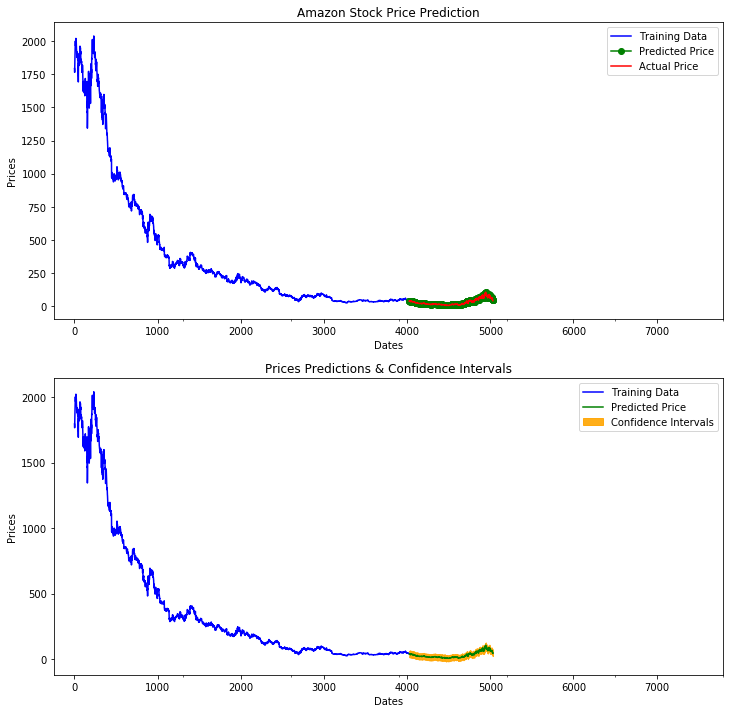

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# --------------------- Actual vs. Predicted --------------------------
axes[0].plot(y_train, color='blue', label='Training Data')
axes[0].plot(test_data.index, forecasts, color='green', marker='o',
             label='Predicted Price')

axes[0].plot(test_data.index, y_test, color='red', label='Actual Price')
axes[0].set_title('Amazon Stock Price Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Prices')

axes[0].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
axes[0].legend()


# ------------------ Predicted with confidence intervals ----------------
axes[1].plot(y_train, color='blue', label='Training Data')
axes[1].plot(test_data.index, forecasts, color='green',
             label='Predicted Price')

axes[1].set_title('Prices Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
axes[1].fill_between(test_data.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")

axes[1].set_xticks(np.arange(0, 7982, 1300).tolist(), df['Date'][0:7982:1300].tolist())
axes[1].legend()


**FBPROPHET**

Use FBProphet graphs and forecasted values in comaprison with ARIMA. 
User can see forecasted table and graph

In [0]:
from fbprophet import Prophet


In [0]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


In [39]:
df.head()

,Date,Close
0,8/7/2019,1793.4000
1,8/6/2019,1787.8300
2,8/5/2019,1765.1300
3,8/2/2019,1823.2400
4,8/1/2019,1855.3199


Prepare for Prophet

In [40]:
df = df[['Date','Close']]
df.head()

,Date,Close
0,8/7/2019,1793.4000
1,8/6/2019,1787.8300
2,8/5/2019,1765.1300
3,8/2/2019,1823.2400
4,8/1/2019,1855.3199


In [0]:
df=df.rename(columns={'Date':'ds', 'Close':'y'})

In [42]:
df.head()

,ds,y
0,8/7/2019,1793.4000
1,8/6/2019,1787.8300
2,8/5/2019,1765.1300
3,8/2/2019,1823.2400
4,8/1/2019,1855.3199


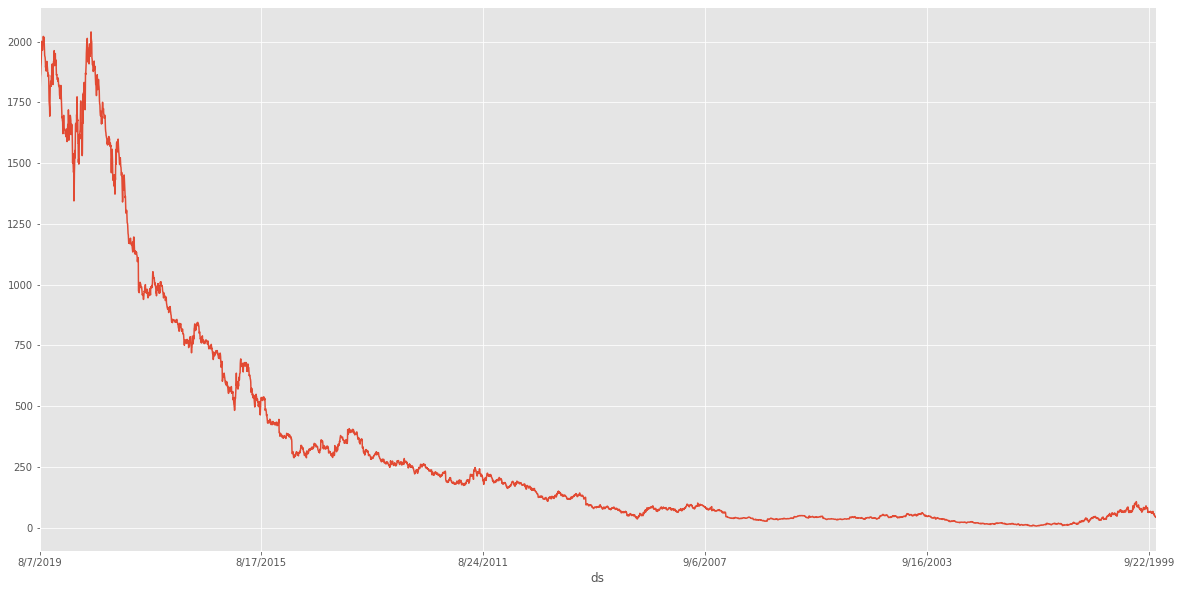

In [43]:
df.set_index('ds').y.plot()

In [44]:
model = Prophet(weekly_seasonality=True)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
5051,2021-03-31
5052,2021-04-30
5053,2021-05-31
5054,2021-06-30
5055,2021-07-31


In [0]:
forecast = model.predict(future)

In [47]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5051,2021-03-31,2569.523548,2470.244510,2663.276018,2529.271174,2612.898276,-2.843288,-2.843288,-2.843288,5.654579,5.654579,5.654579,-8.497866,-8.497866,-8.497866,0.0,0.0,0.0,2566.680261
5052,2021-04-30,2601.392443,2515.331526,2715.120401,2557.989087,2648.025122,11.204156,11.204156,11.204156,5.324097,5.324097,5.324097,5.880059,5.880059,5.880059,0.0,0.0,0.0,2612.596599
5053,2021-05-31,2634.323635,2535.745589,2747.132535,2587.074347,2684.709792,7.922704,7.922704,7.922704,5.619461,5.619461,5.619461,2.303243,2.303243,2.303243,0.0,0.0,0.0,2642.246339
5054,2021-06-30,2666.192530,2575.543972,2783.311045,2615.658826,2721.409109,10.903247,10.903247,10.903247,5.654579,5.654579,5.654579,5.248668,5.248668,5.248668,0.0,0.0,0.0,2677.095777
5055,2021-07-31,2699.123722,2589.038515,2800.472410,2643.819037,2759.536592,-2.992250,-2.992250,-2.992250,-14.592583,-14.592583,-14.592583,11.600332,11.600332,11.600332,0.0,0.0,0.0,2696.131472


In [48]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5051,2021-03-31,2566.680261,2470.244510,2663.276018
5052,2021-04-30,2612.596599,2515.331526,2715.120401
5053,2021-05-31,2642.246339,2535.745589,2747.132535
5054,2021-06-30,2677.095777,2575.543972,2783.311045
5055,2021-07-31,2696.131472,2589.038515,2800.472410


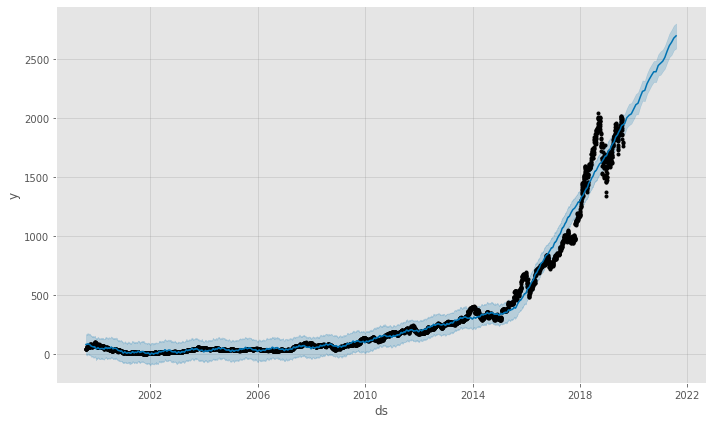

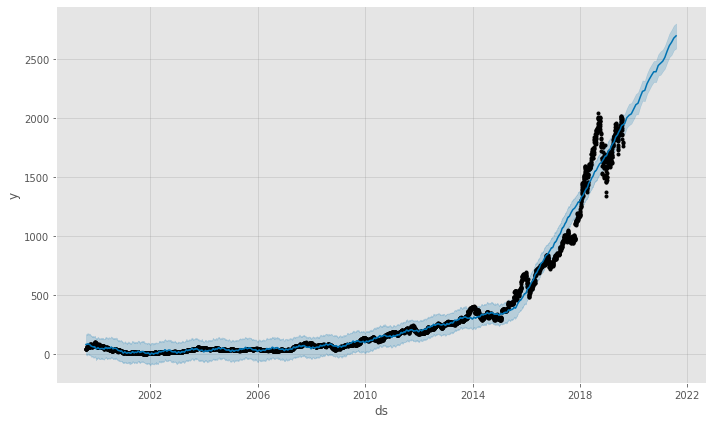

In [49]:
model.plot(forecast)

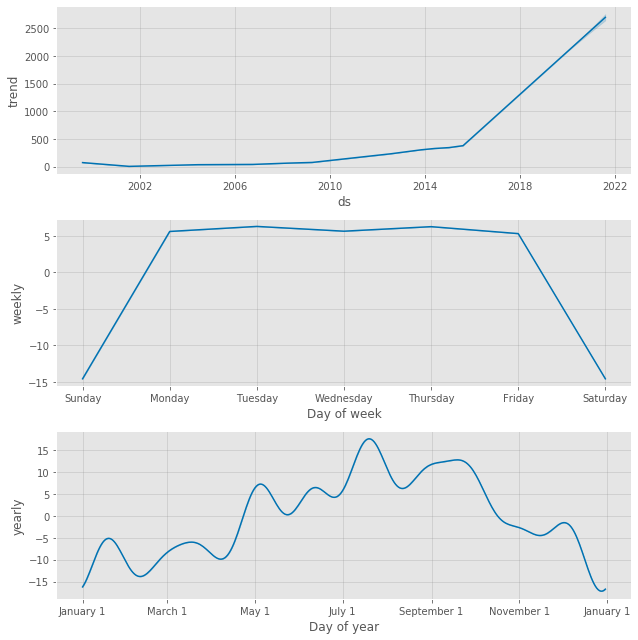

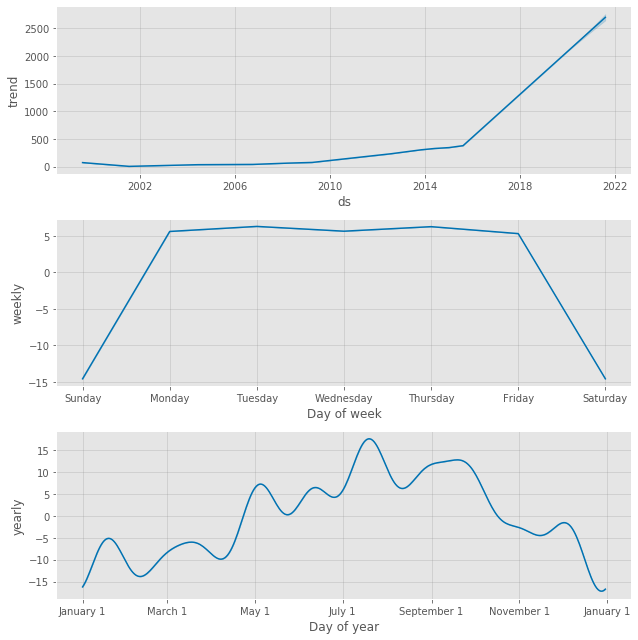

In [50]:
model.plot_components(forecast)

In [51]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 35 forecasts with cutoffs between 2001-11-04 00:00:00 and 2018-08-07 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2001-11-05,5.662133,-0.445928,11.648327,6.99,2001-11-04
1,2001-11-06,5.521064,-0.434510,11.523902,7.05,2001-11-04
2,2001-11-07,5.191697,-1.016221,11.267289,7.43,2001-11-04
3,2001-11-08,4.901184,-0.972530,10.878555,6.97,2001-11-04
4,2001-11-09,4.897653,-0.470481,11.335715,7.12,2001-11-04


In [52]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,36 days,12236.887205,110.620465,47.113358,0.161320,0.389364
1,37 days,12293.429033,110.875737,47.164784,0.162439,0.388636
2,38 days,12332.173549,111.050320,47.176195,0.163988,0.387500
3,39 days,12323.562316,111.011541,47.226331,0.165217,0.387955
4,40 days,12488.288535,111.751011,47.554566,0.166748,0.385227


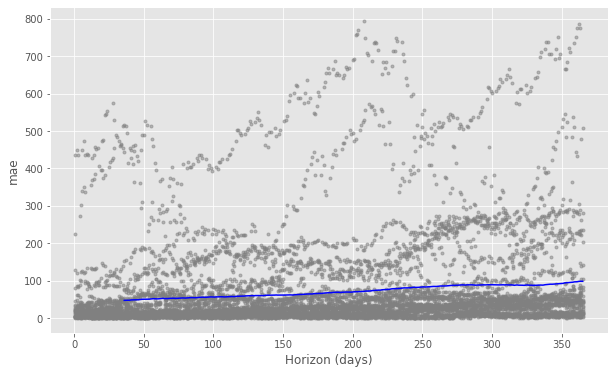

In [53]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')